<a href="https://www.kaggle.com/code/thomaslazarus/visualizing-spotify-top-hits?scriptVersionId=100041060" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv


# Import Data

In [2]:
df = pd.read_csv('/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv')

In [3]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [5]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

# Exploring the Data

<AxesSubplot:title={'center':'Explicit Songs'}, ylabel='explicit'>

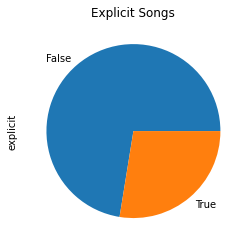

In [6]:
df.explicit.value_counts().plot(kind="pie", title="Explicit Songs")

In [7]:
df.year.describe()

count    2000.00000
mean     2009.49400
std         5.85996
min      1998.00000
25%      2004.00000
50%      2010.00000
75%      2015.00000
max      2020.00000
Name: year, dtype: float64

<AxesSubplot:title={'center':'Song count distribution over the years'}>

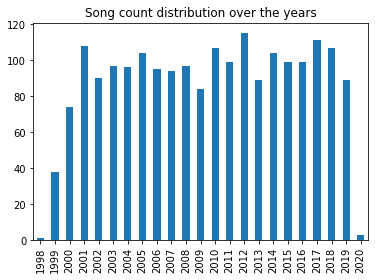

In [8]:
df.year.value_counts().sort_index().plot(kind="bar", title="Song count distribution over the years")

<AxesSubplot:xlabel='year'>

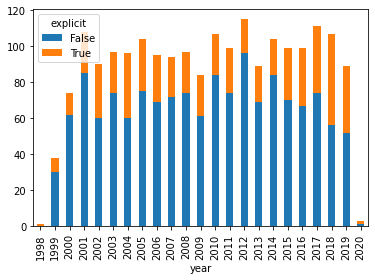

In [9]:
df.groupby(["year", "explicit"]).size().unstack(fill_value=0).plot.bar(stacked=True)

<AxesSubplot:ylabel='Frequency'>

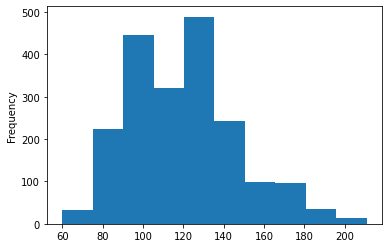

In [10]:
df.tempo.plot(kind="hist")

What's the distribution of major to minor songs?

<AxesSubplot:ylabel='mode'>

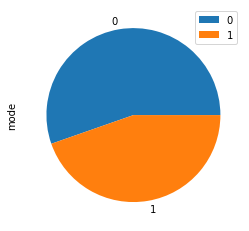

In [11]:
(df["mode"].value_counts().reset_index().plot.pie(y='mode'))

## Coorelation Between Columns

<AxesSubplot:ylabel='Frequency'>

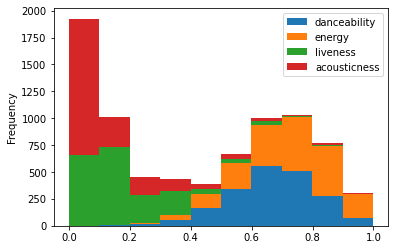

In [12]:
df[["danceability", "energy", "liveness", "acousticness"]].plot.hist(stacked=True)

<AxesSubplot:>

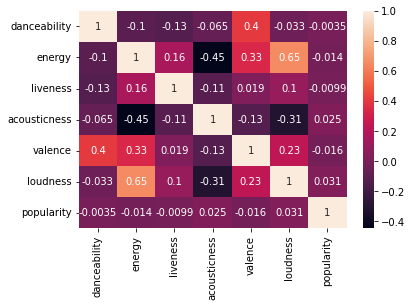

In [13]:
import seaborn as sns
sns.heatmap(df[["danceability", "energy", "liveness", "acousticness", "valence", "loudness", "popularity"]].corr(), annot = True, fmt='.2g')

So as one can expect there is a high coorelation between the "energy" of a song and the overall "loudness" of a song. Another interesting takeaway is that the danceability and valence are also slightly related (with a value of 0.4). Valence, as defined by the dataset is "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)." makes sense that it is at least somewhat coorelated to the "danceability" of a song. 

## The Artist Data

Now I want to try and pull out the artist data from the dataset.

In [14]:
df_artist = df["artist"]

<AxesSubplot:title={'center':'Top 20 artists with songs in the top hits'}>

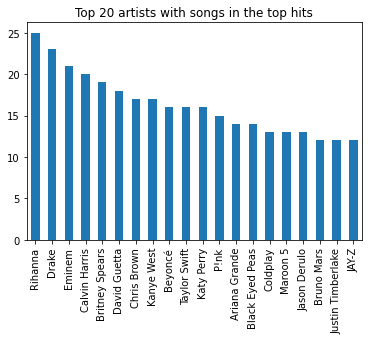

In [15]:
df_artist.value_counts()[:20].plot.bar(title="Top 20 artists with songs in the top hits")

In [16]:
artist_year_df = (df[df.artist.isin(df_artist.value_counts()[:10].index)][["artist", "year", "popularity"]].reset_index())

artist
Beyoncé           [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
Britney Spears    [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
Calvin Harris     [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
Chris Brown       [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
David Guetta      [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
Drake             [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
Eminem            [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
Kanye West        [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
Rihanna           [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
Taylor Swift      [[AxesSubplot(0.125,0.749828;0.352273x0.130172...
dtype: object

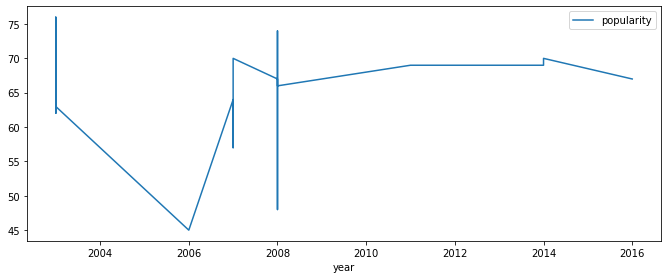

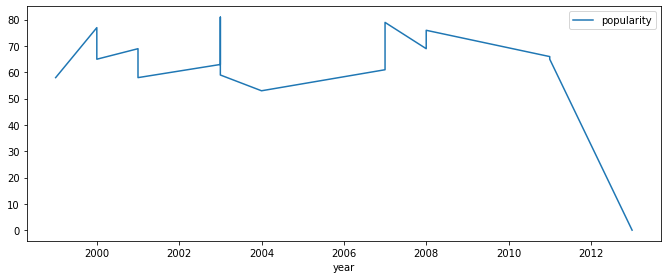

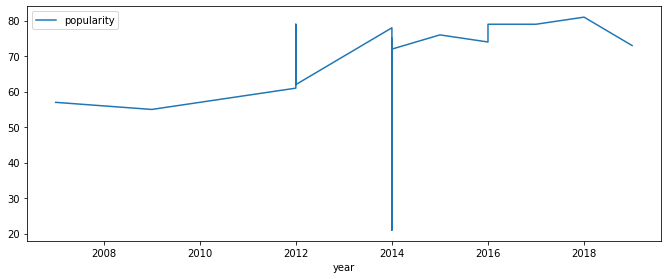

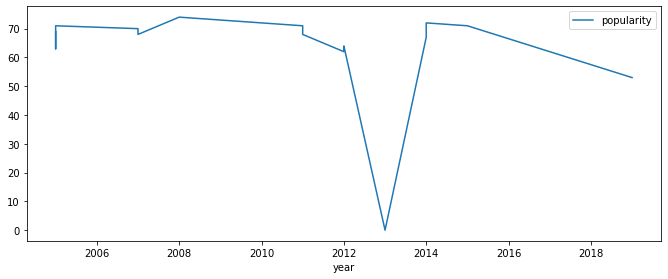

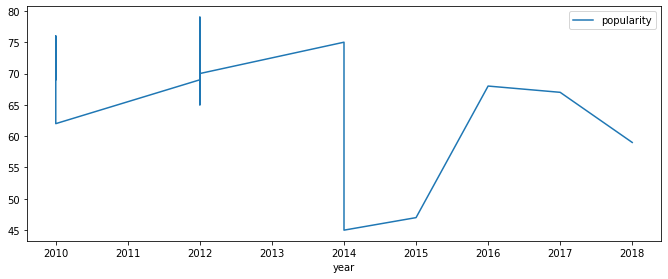

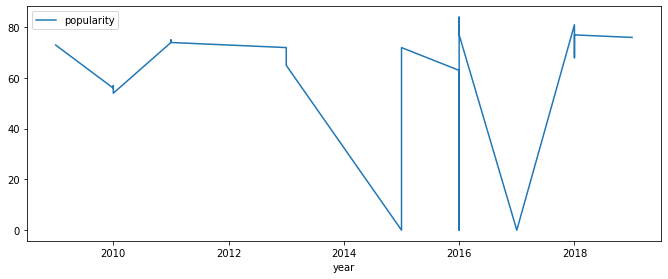

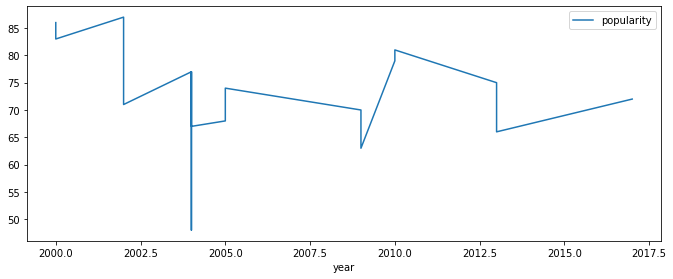

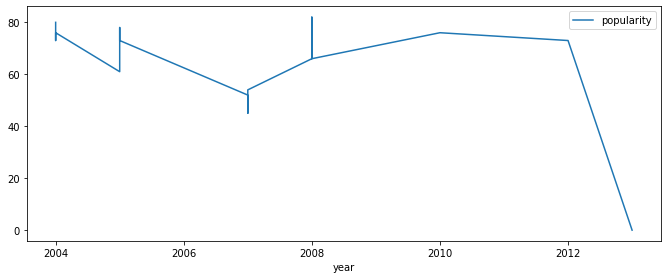

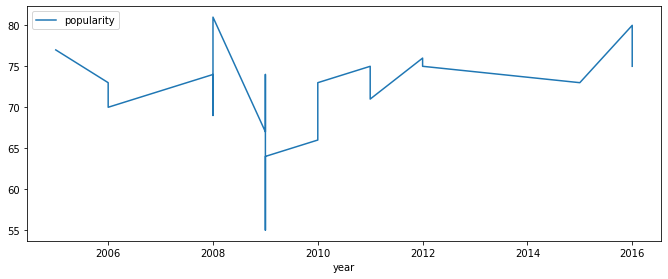

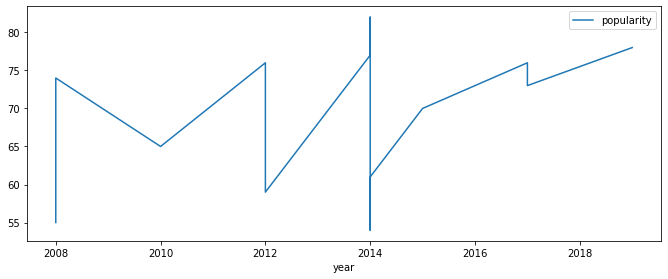

In [17]:
artist_year_df.sort_values('year').groupby('artist').plot.line(x='year', y='popularity', subplots=True, layout=(5,2), figsize=(25,25))

## Splitting out the genres

In [18]:
def split_genres(df):
    df[["genre_1", "genre_2", "genre_3", "genre_4"]] = df.genre.str.split(", ",expand=True)
    return df

In [19]:
df = (df.pipe(split_genres))

array([<AxesSubplot:title={'center':'genre_4'}>], dtype=object)

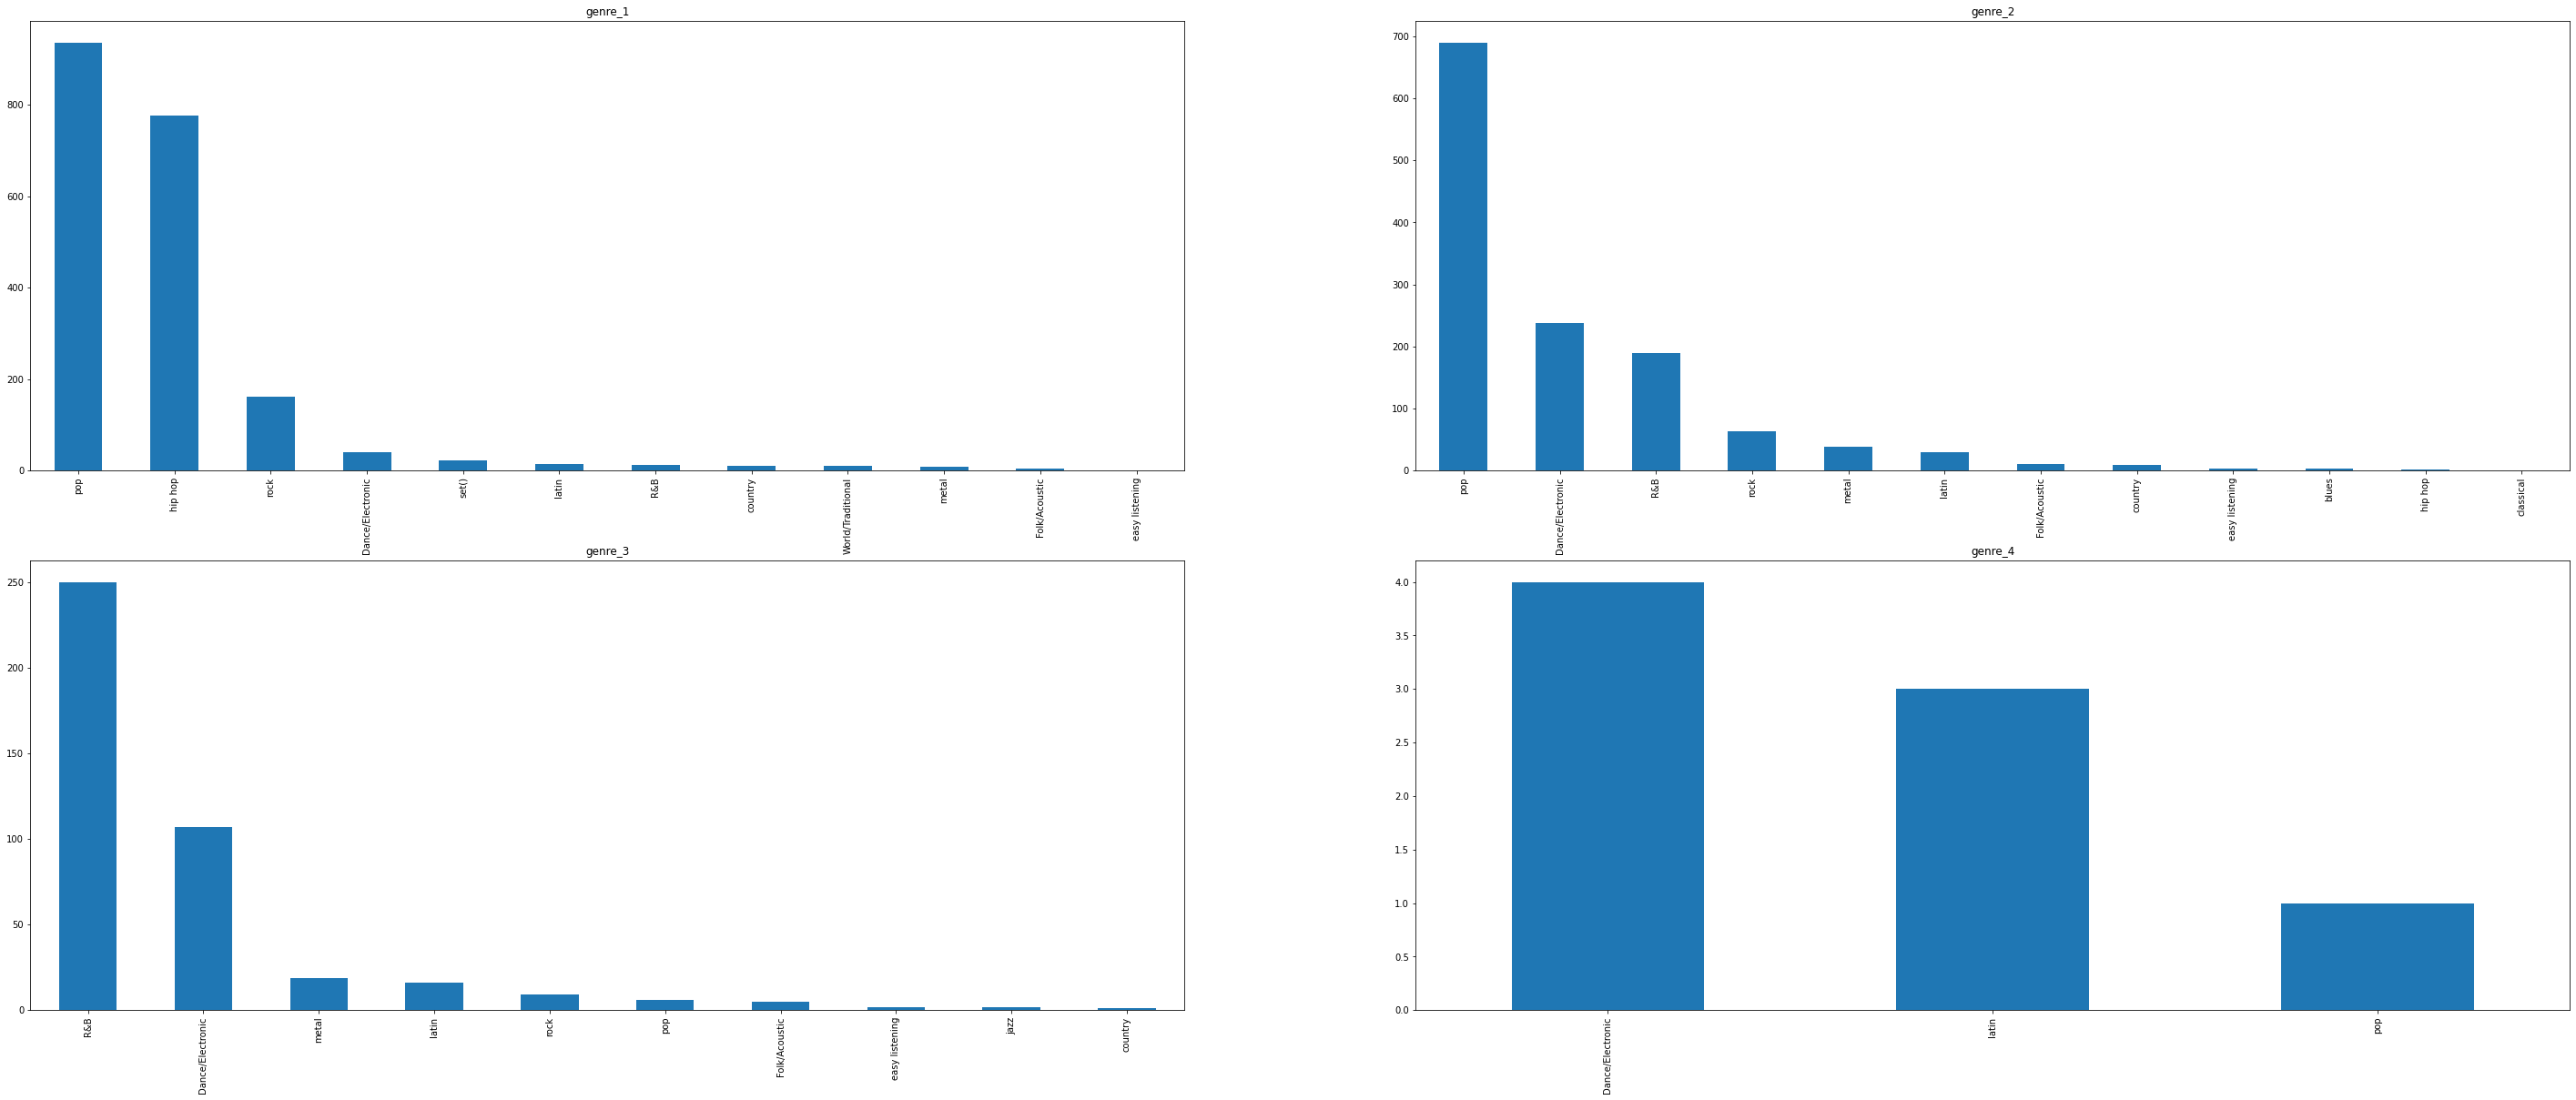

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(50,20))
df.genre_1.value_counts().plot.bar(subplots=True, ax=axes[0,0])
df.genre_2.value_counts().plot.bar(subplots=True, ax=axes[0,1])
df.genre_3.value_counts().plot.bar(subplots=True, ax=axes[1,0])
df.genre_4.value_counts().plot.bar(subplots=True, ax=axes[1,1])

From this breakdown we can see that most songs only have 1 or 2 genres. 

<AxesSubplot:title={'center':'Genre Per Songs Count'}>

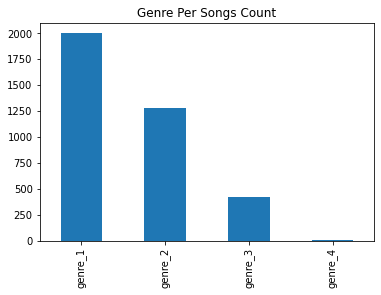

In [21]:
(df[["genre_1", "genre_2", "genre_3", "genre_4"]].count().plot.bar(title="Genre Per Songs Count"))

array([<AxesSubplot:ylabel='genre_4'>], dtype=object)

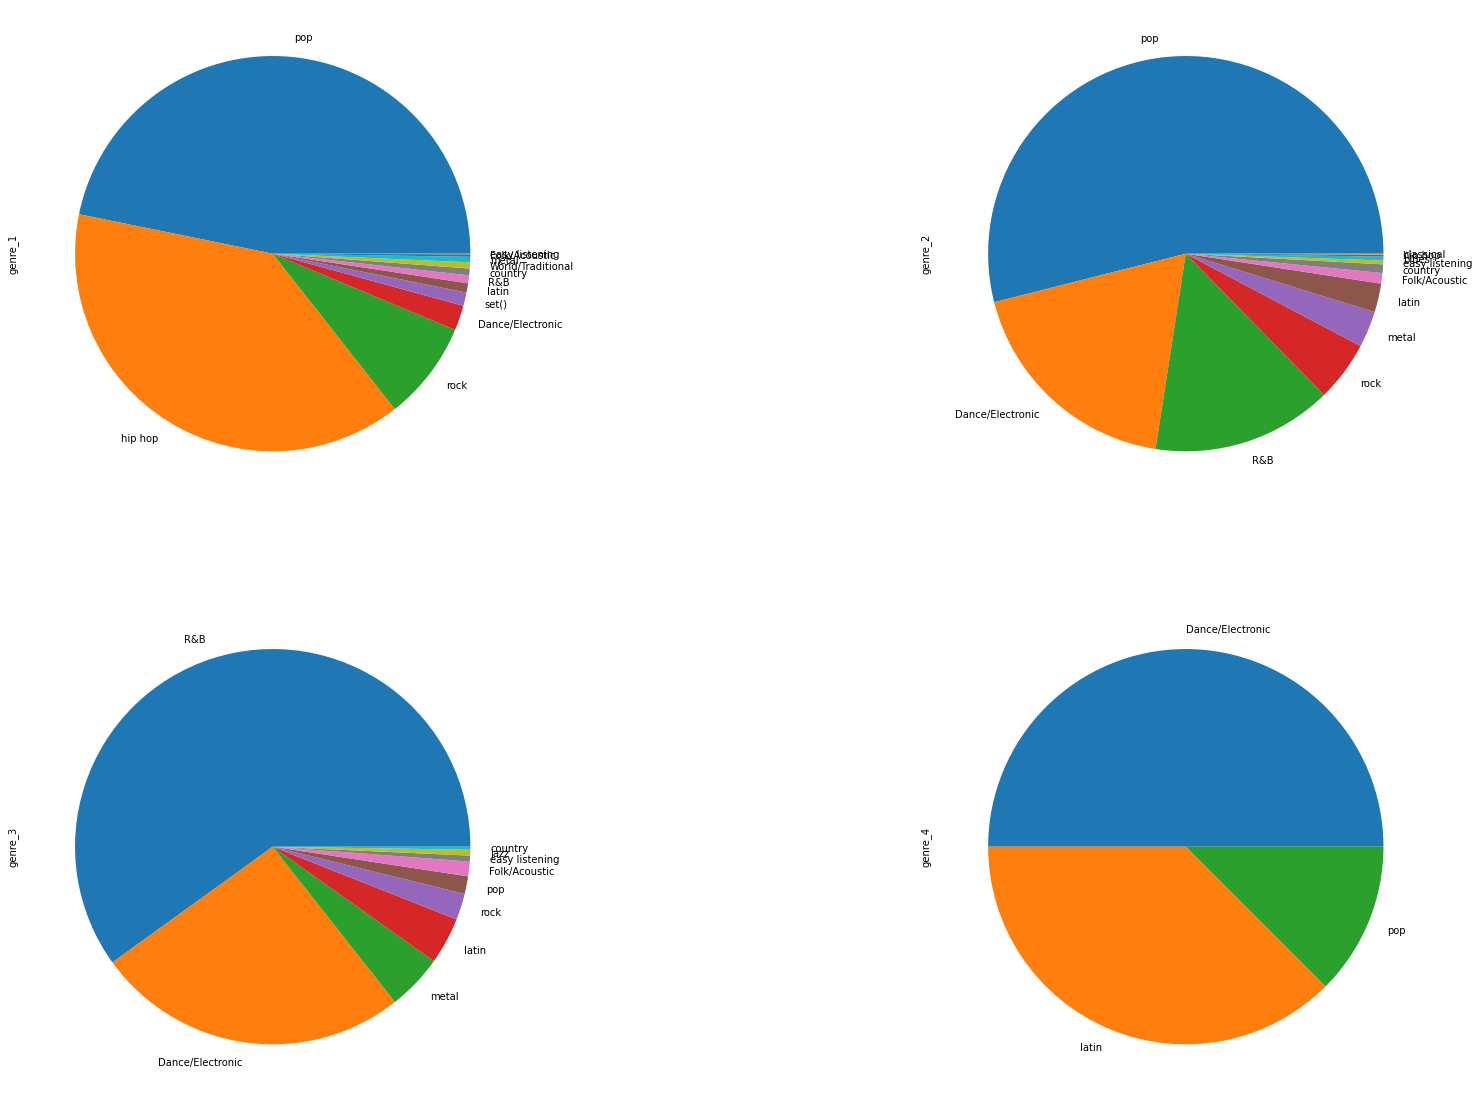

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
df.genre_1.value_counts().plot.pie(subplots=True, ax=axes[0,0])
df.genre_2.value_counts().plot.pie(subplots=True, ax=axes[0,1])
df.genre_3.value_counts().plot.pie(subplots=True, ax=axes[1,0])
df.genre_4.value_counts().plot.pie(subplots=True, ax=axes[1,1])

# Prediction Models

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

model_df = df.drop(["artist", "song", "explicit", "genre", "genre_1", "genre_2", "genre_3", "genre_4"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(model_df.drop("popularity", axis=1), model_df.popularity, test_size=0.33, random_state=42)

## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
linear_reg_score = reg.score(x_train, y_train)
print(f'Linear Regression Score: {linear_reg_score}')
pred = reg.predict(x_test)
linear_reg_r2 = r2_score(y_test, pred)
print(f'R2 Score: {linear_reg_r2}')

Linear Regression Score: 0.009099698524480226
R2 Score: 0.0016094925710282704


## XGBoost

This is my first time working with cross validation and XGBoost, so I'm using this notebook as a starting point https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook.

In [25]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV


kfold = KFold(n_splits=5, shuffle=True)

scores = []

X = model_df.drop("popularity", axis=1)
y = model_df.popularity

xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

scores = cross_val_score(xgb_model, X, y, scoring="neg_mean_squared_error", cv=5)

display_scores(np.sqrt(-scores))

Scores: [17.94136124 19.77857454 20.640548   27.64756173 35.18846196]
Mean: 24.239
Std: 6.388


In [27]:
# from scipy.stats import uniform, randint

# params = {
#     "colsample_bytree": uniform(0.7, 0.3),
#     "gamma": uniform(0, 0.5),
#     "learning_rate": uniform(0.03, 0.3), # default 0.1 
#     "max_depth": randint(2, 6), # default 3
#     "n_estimators": randint(100, 150), # default 100
#     "subsample": uniform(0.6, 0.4)
# }

# search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

# search.fit(X, y)

# xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)
# best_params = search.best_params_

best_params = {'colsample_bytree': 0.7516959613604889, 'gamma': 0.09614450940433539, 'learning_rate': 0.042260584879943656, 'max_depth': 2, 'n_estimators': 117, 'subsample': 0.7114361356127834}

xgb_model.set_params(**best_params)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7516959613604889, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.09614450940433539, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.042260584879943656, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=117, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=None, reg_lambda=None, ...)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

y_pred = xgb_model.predict(X_test)

xgboost_r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {xgboost_r2}')

R2 Score: 0.018805087619705563


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

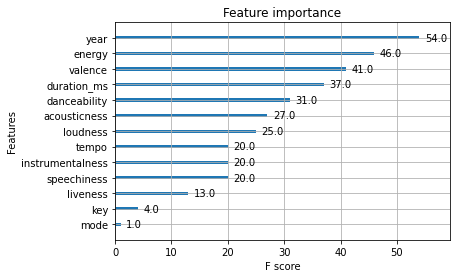

In [29]:
import xgboost as xgb

xgb.plot_importance(xgb_model)

<AxesSubplot:>

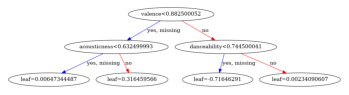

In [30]:
xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

## R2 Analysis

<AxesSubplot:xlabel='model'>

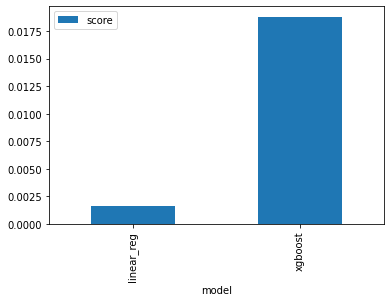

In [31]:
r2_df = pd.DataFrame({'model': ['linear_reg', 'xgboost'], 'score': [linear_reg_r2, xgboost_r2]})
r2_df.set_index('model').plot.bar()

# Conclusion

In this notebook I expermineted a bit with some data visualization and using different regression models to predict the `popularity` of a song. I used a randomized search for the XGBoost hyper paramaters and ended up getting an r^2 score that was much better than the Logistic Regression model.